# Small Area Income and Poverty Estimates (SAIPE): School Districts

This data is a time series, which means that we don't have to
query for a specific year like we do with survey data like the
ACS. Instead, when we download we get multiple years of data at
once.

See https://www.census.gov/data/developers/data-sets/Poverty-Statistics.html.

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(
        os.path.abspath(os.path.join(os.path.curdir, os.path.pardir, os.path.pardir))
    )
)

In [2]:
import censusdis.data as ced

from censusdis.states import STATE_NJ

In [3]:
SD_UNIFIED_EO = "04230"
SD_UNIFIED_EWR = "11340"
SD_UNIFIED_IRV = "07680"
SD_UNIFIED_MB = "10200"
SD_UNIFIED_MC = "10560"
SD_UNIFIED_OC = "12270"
SD_UNIFIED_SOMA = "15330"
SD_UNIFIED_UNT = "16500"
SD_UNIFIED_WO = "17610"

SD_UNIFIED_ALL = [
    SD_UNIFIED_EO,
    SD_UNIFIED_EWR,
    SD_UNIFIED_IRV,
    SD_UNIFIED_MB,
    SD_UNIFIED_MC,
    SD_UNIFIED_OC,
    SD_UNIFIED_SOMA,
    SD_UNIFIED_UNT,
    SD_UNIFIED_WO,
]

In [4]:
DATASET = "timeseries/poverty/saipe/schdist"

In [5]:
df_variables = ced.variables.all_variables(DATASET, "timeseries", None)

UUU timeseries/poverty/saipe/schdist timeseries


In [6]:
df_variables

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,timeseries,timeseries/poverty/saipe/schdist,N/A,GEOCAT,"Summary Level (950 Elementary, 960 Secondary, ...",NaN,"{'980': 'Administrative', '970': 'Unified', '9..."
1,timeseries,timeseries/poverty/saipe/schdist,N/A,GEOID,Combined codes for the reference geography,NaN,None
2,timeseries,timeseries/poverty/saipe/schdist,N/A,GRADE,Grade Range of District,NaN,None
3,timeseries,timeseries/poverty/saipe/schdist,N/A,LEAID,School District ID,NaN,None
4,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOV5_17RV_PT,Relevant Age 5 to 17 in Families in Poverty,NaN,{'0': 'Relevant Age 5 to 17 in Families in Pov...
5,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOV5_17V_PT,Relevant Age 5 to 17 Population,NaN,{'0': 'Relevant Age 5 to 17 Population'}
6,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOVALL_PT,Total Population,NaN,{'0': 'Total Population'}
7,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOVRAT5_17RV_PT,Relevant Age 5 to 17 Poverty Ratio Estimate,NaN,None
8,timeseries,timeseries/poverty/saipe/schdist,N/A,SD_NAME,District Name,NaN,None
9,timeseries,timeseries/poverty/saipe/schdist,N/A,STATE,State Fips Code,NaN,None


In [7]:
variables = ced.variables.group_leaves(DATASET, "timeseries", None)

variables = [v for v in variables if v != "time"]

variables

['GEOCAT',
 'GEOID',
 'GRADE',
 'LEAID',
 'SAEPOV5_17RV_PT',
 'SAEPOV5_17V_PT',
 'SAEPOVALL_PT',
 'SAEPOVRAT5_17RV_PT',
 'SD_NAME',
 'STATE',
 'YEAR']

In [8]:
gdf_ts = ced.download(
    DATASET,
    "timeseries",
    [v for v in variables if v != "STATE"],
    state=STATE_NJ,
    school_district_unified=SD_UNIFIED_ALL,
    with_geometry=True,
)

gdf_ts

,YEAR,STATE,SCHOOL_DISTRICT_UNIFIED,GEOCAT,GEOID,GRADE,LEAID,SAEPOV5_17RV_PT,SAEPOV5_17V_PT,SAEPOVALL_PT,SAEPOVRAT5_17RV_PT,SD_NAME,geometry
0,1995,34,04230,970,3404230,KG-12,04230,3898,13546,71239,28.8,EAST ORANGE,None
1,1995,34,07680,970,3407680,KG-12,07680,2401,11682,59099,20.6,IRVINGTON TOWNSHIP,None
2,1995,34,10200,970,3410200,PK-12,10200,47,3016,18044,1.6,MILLBURN TWP,None
3,1995,34,10560,970,3410560,PK-12,10560,409,5626,36542,7.3,MONTCLAIR TOWN,None
4,1995,34,11340,970,3411340,PK-12,11340,24448,57748,266565,42.3,NEWARK CITY,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2021,34,11340,970,3411340,KG-12,11340,15814,54847,308371,28.8,Newark City School District,"POLYGON ((-74.25136 40.73753, -74.24975 40.738..."
221,2021,34,12270,970,3412270,KG-12,12270,1347,5884,34096,22.9,Orange City Township School District,"POLYGON ((-74.25429 40.76006, -74.25290 40.761..."
222,2021,34,15330,970,3415330,KG-12,15330,331,8000,43717,4.1,South Orange-Maplewood School District,"POLYGON ((-74.29266 40.75272, -74.29214 40.756..."
223,2021,34,16500,970,3416500,KG-12,16500,678,8333,59393,8.1,Union Township School District,"POLYGON ((-74.31176 40.69007, -74.30893 40.690..."


In [9]:
gdf_ts["School District"] = gdf_ts["SCHOOL_DISTRICT_UNIFIED"].map(
    {
        district: df_district[df_district["YEAR"] == max(df_district["YEAR"])][
            "SD_NAME"
        ].iloc[0]
        for district, df_district in gdf_ts.groupby("SCHOOL_DISTRICT_UNIFIED")
    },
)


# for district, df_district in df_ts.groupby('SCHOOL_DISTRICT_UNIFIED'):
#    print(df_district[df_district['YEAR'] == max(df_district['YEAR'])]['SD_NAME'].iloc[0])

In [10]:
gdf_ts

,YEAR,STATE,SCHOOL_DISTRICT_UNIFIED,GEOCAT,GEOID,GRADE,LEAID,SAEPOV5_17RV_PT,SAEPOV5_17V_PT,SAEPOVALL_PT,SAEPOVRAT5_17RV_PT,SD_NAME,geometry,School District
0,1995,34,04230,970,3404230,KG-12,04230,3898,13546,71239,28.8,EAST ORANGE,None,East Orange City School District
1,1995,34,07680,970,3407680,KG-12,07680,2401,11682,59099,20.6,IRVINGTON TOWNSHIP,None,Irvington Township School District
2,1995,34,10200,970,3410200,PK-12,10200,47,3016,18044,1.6,MILLBURN TWP,None,Millburn Township School District
3,1995,34,10560,970,3410560,PK-12,10560,409,5626,36542,7.3,MONTCLAIR TOWN,None,Montclair Town School District
4,1995,34,11340,970,3411340,PK-12,11340,24448,57748,266565,42.3,NEWARK CITY,None,Newark City School District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2021,34,11340,970,3411340,KG-12,11340,15814,54847,308371,28.8,Newark City School District,"POLYGON ((-74.25136 40.73753, -74.24975 40.738...",Newark City School District
221,2021,34,12270,970,3412270,KG-12,12270,1347,5884,34096,22.9,Orange City Township School District,"POLYGON ((-74.25429 40.76006, -74.25290 40.761...",Orange City Township School District
222,2021,34,15330,970,3415330,KG-12,15330,331,8000,43717,4.1,South Orange-Maplewood School District,"POLYGON ((-74.29266 40.75272, -74.29214 40.756...",South Orange-Maplewood School District
223,2021,34,16500,970,3416500,KG-12,16500,678,8333,59393,8.1,Union Township School District,"POLYGON ((-74.31176 40.69007, -74.30893 40.690...",Union Township School District


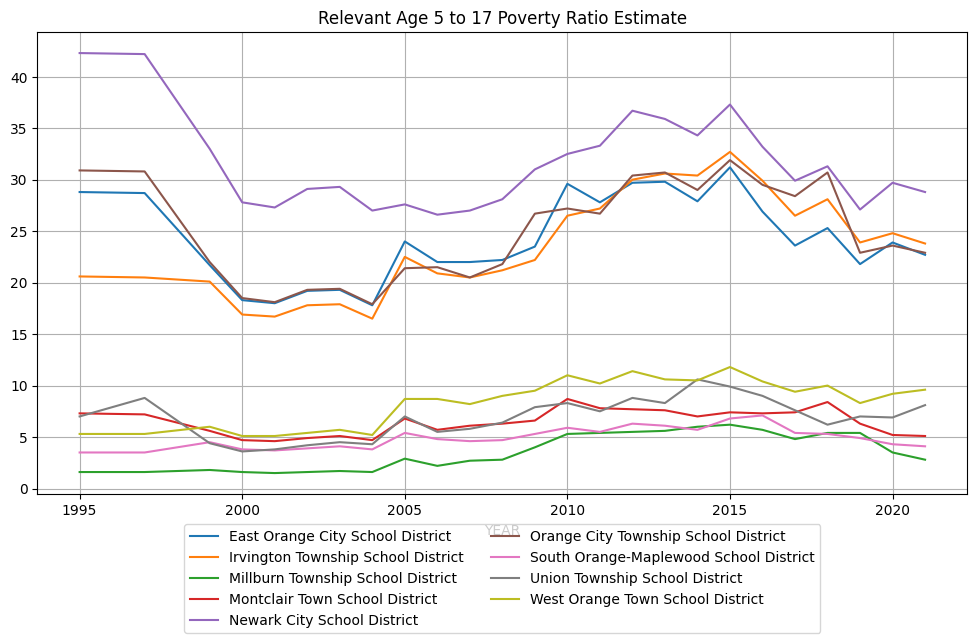

In [11]:
ax = gdf_ts.pivot(
    index="YEAR", columns="School District", values="SAEPOVRAT5_17RV_PT"
).plot(figsize=(12, 6))

ax.grid(True)

ax.set_title(
    df_variables[df_variables.VARIABLE == "SAEPOVRAT5_17RV_PT"]["LABEL"].iloc[0]
)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncols=2)

In [12]:
map_year = 2021

gdf_map = gdf_ts[gdf_ts["YEAR"] == map_year]

Text(0.5, 1.0, 'School Districts Around SOMA in 2021')

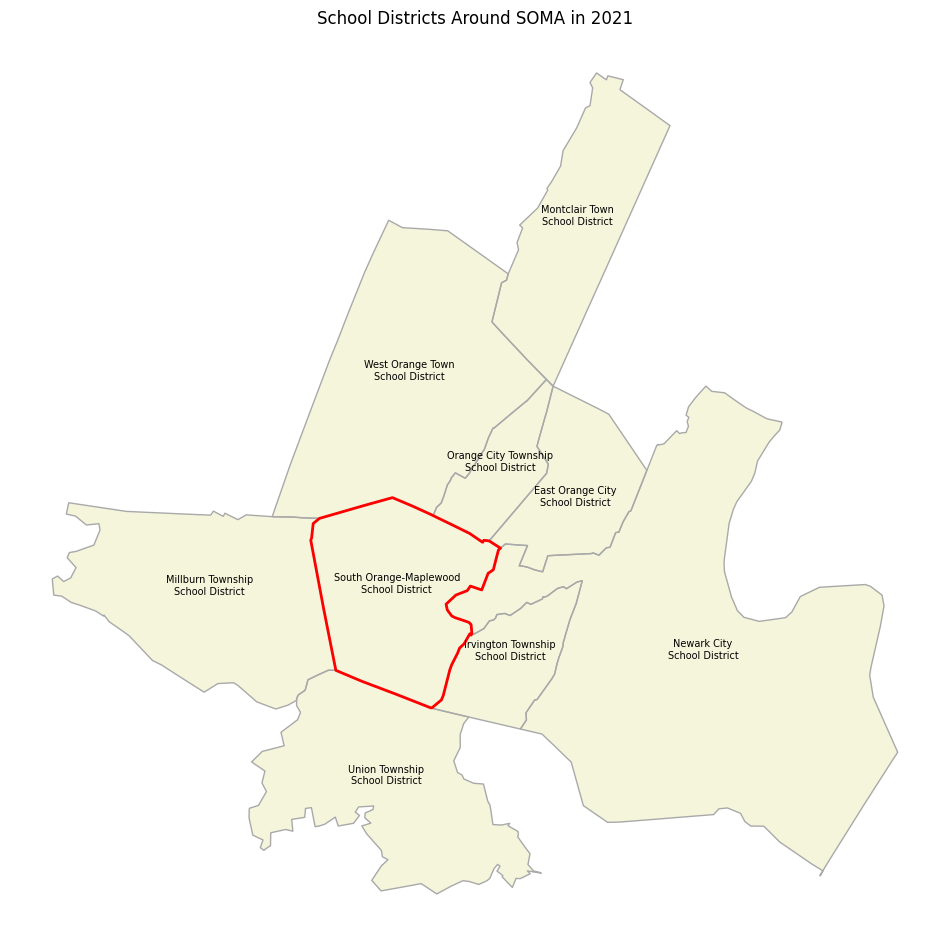

In [13]:
from adjustText import adjust_text

ax = gdf_map.plot(color="beige", figsize=(12, 12))
ax = gdf_map.boundary.plot(ax=ax, color="darkgrey", linewidth=1)
ax = gdf_map[gdf_map["SCHOOL_DISTRICT_UNIFIED"] == SD_UNIFIED_SOMA].boundary.plot(
    ax=ax, color="red", linewidth=2
)

texts = []

for _, row in gdf_map.iterrows():
    centroid = row["geometry"].centroid
    texts.append(
        ax.text(
            centroid.x,
            centroid.y,
            row["SD_NAME"]
            .split(",")[0]
            .replace(" School District", "\nSchool District"),
            ha="center",
            fontsize=7,
        )
    )

adjust_text(texts, autoalign="y", force_points=(0, 0))

ax.axis("off")

ax.set_title(f"School Districts Around SOMA in {map_year}")